In [1]:
import torch
from mde.data.mono_dataset import KITTIRAWDataset
import matplotlib.pyplot as plt
import lightning as L
from torch import utils
from training_module import MDE
import matplotlib.pyplot as plt
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
torch.set_float32_matmul_precision('high')
mde = MDE()
dataset = KITTIRAWDataset('/app/data/data_depth_annotated/2011_09_26',
                                            100,332,
                                           [0], 1,drives=[1,2,5,9,11,13,14,15], is_train=True)
dataset_val = KITTIRAWDataset('/app/data/data_depth_annotated/2011_09_26',
                                            100,332,
                                           [0], 1,drives=[84], is_train=False)
train_loader = utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=24)
val_loader = utils.data.DataLoader(dataset_val, batch_size=16, shuffle=False, num_workers=24)
trainer = L.Trainer( max_epochs=20,log_every_n_steps=5,callbacks=[EarlyStopping(monitor="g_val_loss",patience=4, mode="min")])
trainer.fit(model=mde, train_dataloaders=train_loader,val_dataloaders=val_loader)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [2]:
from PIL import Image
import numpy as np

imgs = [mde.mde_unet(d[0].unsqueeze(0)).squeeze(0).permute(1,2,0).squeeze(-1).detach().numpy() for d in dataset_val]
# duration is the number of milliseconds between frames; this is 40 frames per second
imgs = (imgs/np.max(imgs))*255.0
imgs = [Image.fromarray(i) for i in imgs]
imgs[0].save("/app/array2.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)


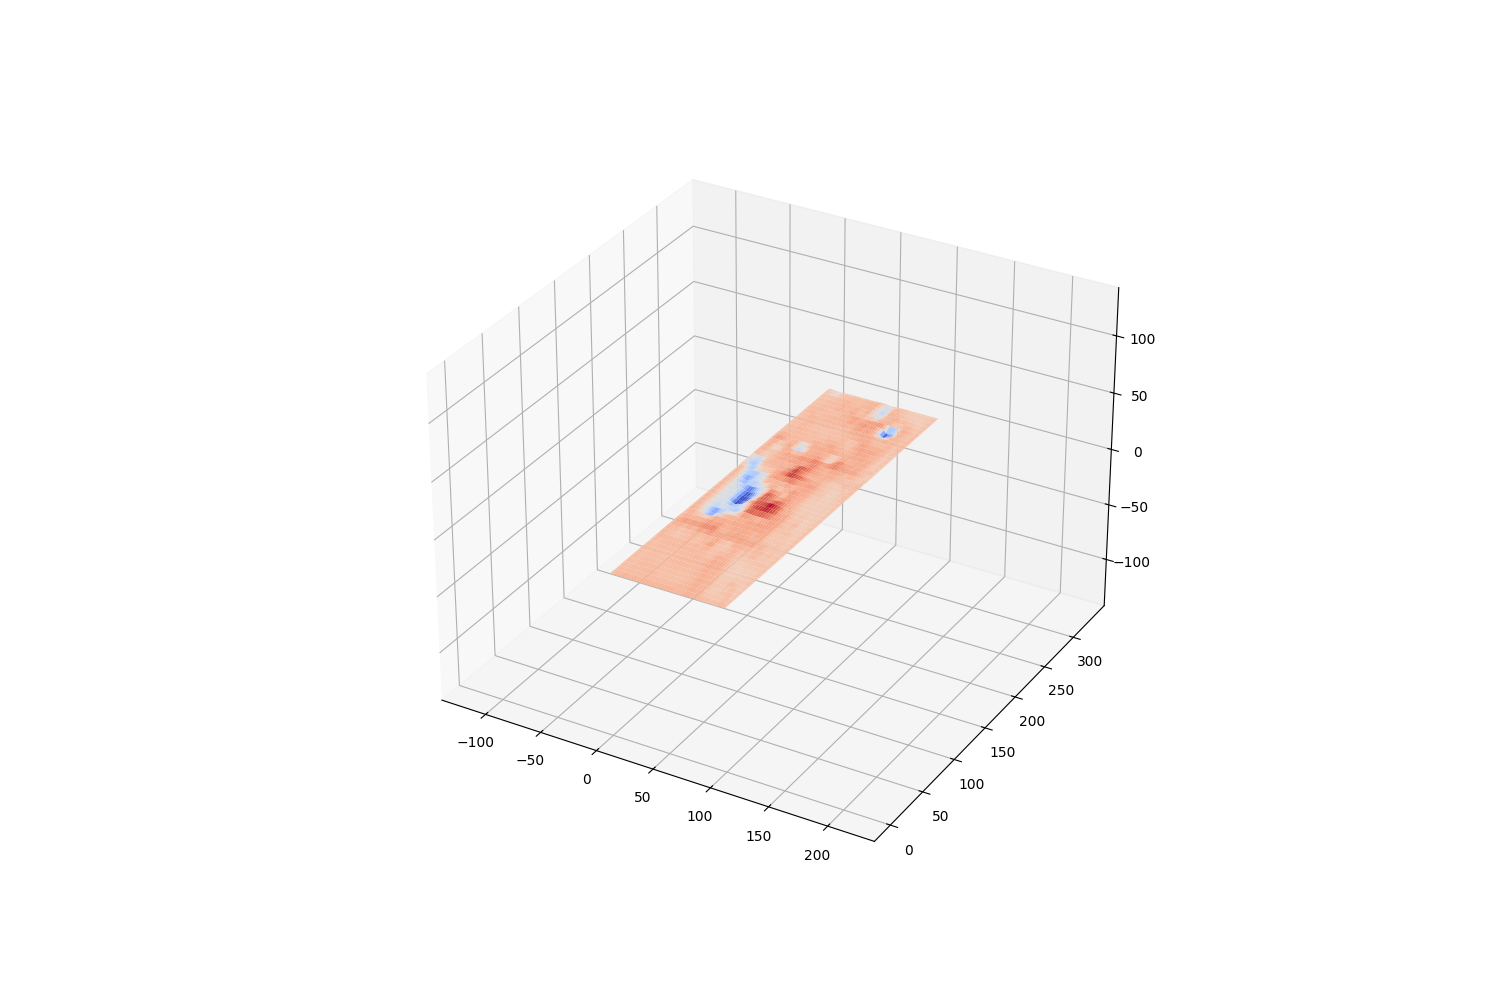

In [114]:
%matplotlib widget 
import numpy as np
from matplotlib import cm
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")

img=mde.mde_unet(dataset_val[0][0].unsqueeze(0)).squeeze(0).permute(1,2,0).squeeze(-1).detach().numpy()
X, Y = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]))
ax.plot_surface(
    X,
    Y,
    img[X,Y],
    cmap=cm.coolwarm
   
)
ax.axis('equal')
plt.show()


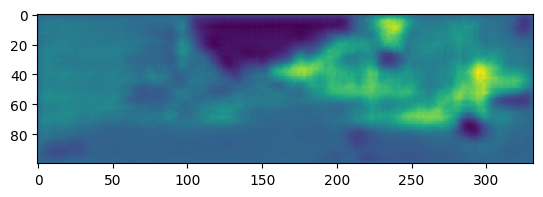

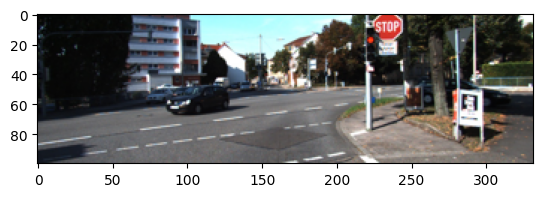

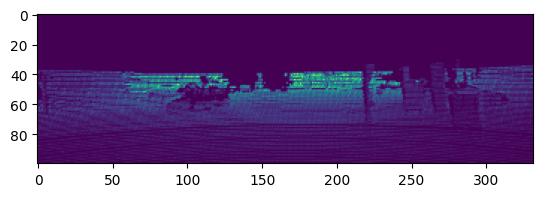

In [4]:
%matplotlib inline


plt.imshow(mde.mde_unet(dataset_val[0][0].unsqueeze(0)).squeeze(0).permute(1,2,0).detach().numpy())
plt.show()
plt.imshow(dataset_val[0][0].squeeze(0).permute(1,2,0).detach().numpy() )
plt.show()
plt.imshow(dataset_val[0][1].squeeze(0).detach().numpy() )
plt.show()